In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from joblib import dump

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print('ML algorithm that detect anomally in electrical system in python')

ML algorithm that detect anomally in electrical system in python


In [7]:
# read the dataset
power_grid_df = pd.read_csv('/content/drive/MyDrive/Engineering Analysis/sp_03_data.csv')
power_grid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305808 entries, 0 to 305807
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 305808 non-null  int64  
 1   file_id            305808 non-null  int64  
 2   FeederIdentifier   305808 non-null  object 
 3   Frequency          305808 non-null  float64
 4   UAN                305808 non-null  float64
 5   UBN                305808 non-null  float64
 6   UCN                305808 non-null  float64
 7   IA                 305808 non-null  float64
 8   IB                 305808 non-null  float64
 9   IC                 305808 non-null  float64
 10  PowerFactorA       305808 non-null  float64
 11  PowerFactorB       305808 non-null  float64
 12  PowerFactorC       305808 non-null  float64
 13  UnbalanceU         305808 non-null  float64
 14  UnbalanceI         305808 non-null  float64
 15  EnergyExp          305808 non-null  float64
 16  En

In [8]:
power_grid_df

,id,file_id,FeederIdentifier,Frequency,UAN,UBN,UCN,IA,IB,IC,...,UnbalanceI,EnergyExp,EnergyTot,THDUAvg,THDIAvg,CreationTimeStamp,discoName,substation,feeder,createdAt
0,1,1,AEDC-B_52-RM_1A,49.94,6124.78,6093.90,6141.56,0.00,0.00,0.00,...,0.00,41928180.0,83235460.0,9371648.0,0,2022-03-10 10:00:29.000,AEDC,B_52,RM_1A,2022-04-02 22:19:10.987
1,2,1,AEDC-B_52-RM_2A,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,86299990.0,0.0,0,2022-03-10 09:23:47.000,AEDC,B_52,RM_2A,2022-04-02 22:19:10.987
2,3,1,AEDC-B_52-RM_2A,50.10,6446.29,6382.12,6405.51,0.00,0.00,0.00,...,0.00,0.0,86299990.0,11993090.0,0,2022-03-10 09:35:47.000,AEDC,B_52,RM_2A,2022-04-02 22:19:10.990
3,4,1,AEDC-B_52-RM_2B,49.47,5969.10,5929.15,5952.46,107.33,113.49,105.46,...,1.00,0.0,188099400.0,11731250.0,0,2022-03-10 09:12:30.000,AEDC,B_52,RM_2B,2022-04-02 22:19:10.990
4,5,1,AEDC-B_52-RM_3A,50.29,6165.83,6313.80,6249.39,0.00,0.00,0.00,...,0.00,0.0,87997700.0,84738050.0,0,2022-03-10 09:55:23.000,AEDC,B_52,RM_3A,2022-04-02 22:19:10.993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305803,305804,519,YEDC-POL_ROUND-TF,50.23,6314.67,6448.98,6304.00,0.00,0.00,0.00,...,0.00,0.0,201590100.0,12451840.0,0,2022-03-31 23:49:08.000,YEDC,POL_ROUND,TF,2022-04-02 22:29:26.147
305804,305805,519,YEDC-POL_ROUND-YRF,50.22,6377.68,6525.29,6371.05,212.12,211.76,208.11,...,0.01,0.0,211247100.0,10944670.0,0,2022-03-31 23:06:10.000,YEDC,POL_ROUND,YRF,2022-04-02 22:29:26.150
305805,305806,519,YEDC-POL_ROUND-YRF,50.23,6319.10,6452.95,6297.76,217.00,220.78,210.94,...,0.03,0.0,211254900.0,10485890.0,0,2022-03-31 23:18:09.000,YEDC,POL_ROUND,YRF,2022-04-02 22:29:26.150
305806,305807,519,YEDC-POL_ROUND-YRF,50.21,6263.74,6414.36,6251.20,205.76,206.45,199.26,...,0.02,0.0,211270200.0,10485900.0,0,2022-03-31 23:42:10.000,YEDC,POL_ROUND,YRF,2022-04-02 22:29:26.153


In [9]:
# Load and preprocess the data for X
X = power_grid_df.drop(columns=["id", "file_id", "FeederIdentifier", "CreationTimeStamp", "createdAt",
                                "discoName", "substation", "feeder"])
X

,Frequency,UAN,UBN,UCN,IA,IB,IC,PowerFactorA,PowerFactorB,PowerFactorC,UnbalanceU,UnbalanceI,EnergyExp,EnergyTot,THDUAvg,THDIAvg
0,49.94,6124.78,6093.90,6141.56,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,41928180.0,83235460.0,9371648.0,0
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.0,86299990.0,0.0,0
2,50.10,6446.29,6382.12,6405.51,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.0,86299990.0,11993090.0,0
3,49.47,5969.10,5929.15,5952.46,107.33,113.49,105.46,0.97,0.98,0.99,1.00,1.00,0.0,188099400.0,11731250.0,0
4,50.29,6165.83,6313.80,6249.39,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.0,87997700.0,84738050.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305803,50.23,6314.67,6448.98,6304.00,0.00,0.00,0.00,1.00,1.00,1.00,0.01,0.00,0.0,201590100.0,12451840.0,0
305804,50.22,6377.68,6525.29,6371.05,212.12,211.76,208.11,0.96,0.95,0.96,0.01,0.01,0.0,211247100.0,10944670.0,0
305805,50.23,6319.10,6452.95,6297.76,217.00,220.78,210.94,0.97,0.96,0.96,0.01,0.03,0.0,211254900.0,10485890.0,0
305806,50.21,6263.74,6414.36,6251.20,205.76,206.45,199.26,0.96,0.96,0.96,0.02,0.02,0.0,211270200.0,10485900.0,0


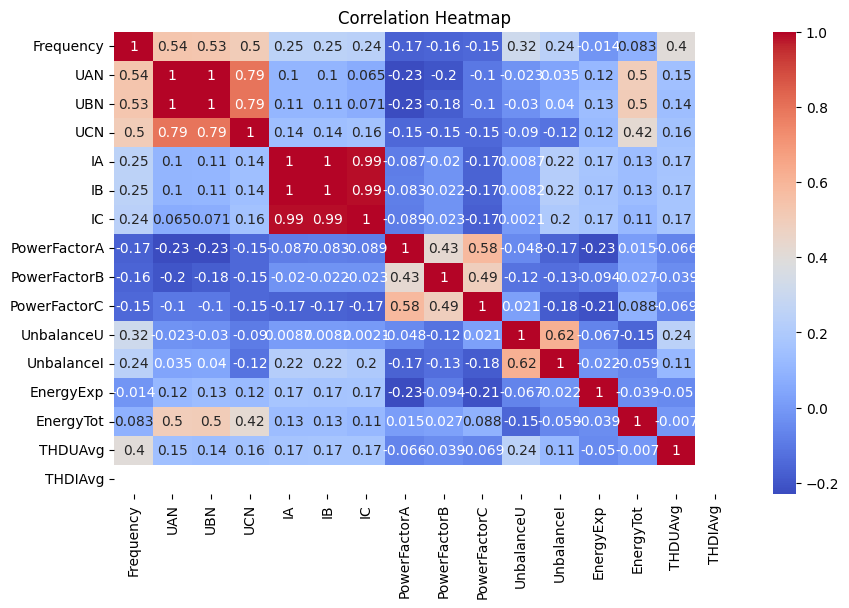

In [16]:
import seaborn as sns

# Calculate the correlation matrix
correlation = X.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
y = power_grid_df["discoName"]
y

,discoName
0,AEDC
1,AEDC
2,AEDC
3,AEDC
4,AEDC
...,...
305803,YEDC
305804,YEDC
305805,YEDC
305806,YEDC


In [8]:
# split the data into
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define the model
# model = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])
model = RandomForestClassifier(random_state=42)

In [10]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# persist the trained model
dump(model, 'trained-model-randforest.joblib')

['trained-model-randforest.joblib']

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array(['YEDC', 'AEDC', 'EKO', ..., 'PHED', 'EEDC', 'EEDC'], dtype=object)

In [13]:
# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9963212452176188


In [14]:
recall = metrics.recall_score(y_test, y_pred, zero_division=1, average="weighted")
print(f'Recall Score: {recall}')

Recall Score: 0.9963212452176188


In [15]:
precision = metrics.precision_score(y_test, y_pred, zero_division=1, average="weighted")
print(f'Precision Score: {precision}')

Precision Score: 0.9963987954156419


In [16]:
# Evaluate the model classification report
report = metrics.classification_report(y_test, y_pred, zero_division=1)
report

'              precision    recall  f1-score   support\n\n        AEDC       1.00      0.99      0.99     12040\n        BEDC       1.00      1.00      1.00      4560\n        EEDC       1.00      1.00      1.00      4093\n         EKO       1.00      1.00      1.00      6352\n       IBEDC       0.96      1.00      0.98      2946\n         IKJ       1.00      1.00      1.00      8224\n        JEDC       1.00      1.00      1.00      4274\n      KAEDCO       1.00      1.00      1.00      2678\n       KEDCO       1.00      1.00      1.00      5068\n        PHED       1.00      1.00      1.00      6285\n        YEDC       1.00      1.00      1.00      4642\n\n    accuracy                           1.00     61162\n   macro avg       0.99      1.00      1.00     61162\nweighted avg       1.00      1.00      1.00     61162\n'

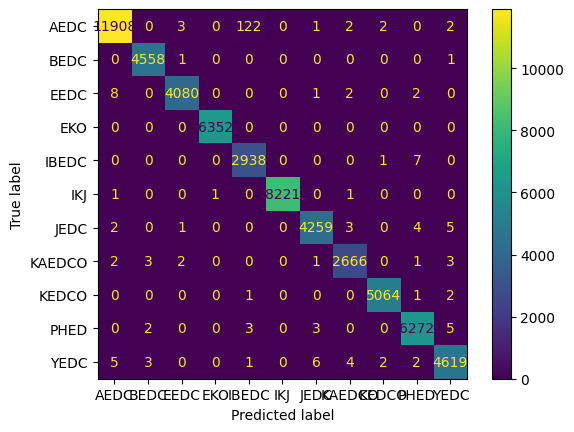

In [17]:
# plot confusion matrix chart

cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
# Determine the ROC curve

y_pred_proba = model.predict_proba(X_test) [::,1]

# Calculate false and true positive rates
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

# Calculate model AUC score
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# plot the ROC curve
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)

ValueError: multiclass format is not supported

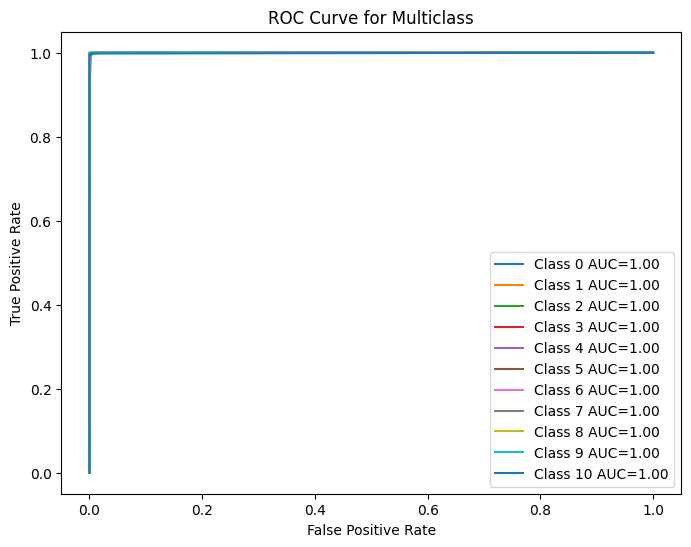

In [19]:
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Get probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Initialize variables to store ROC and AUC for each class
false_positive_rate = {}
true_positive_rate = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(y_test_binarized.shape[1]):
    false_positive_rate[i], true_positive_rate[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(false_positive_rate[i], true_positive_rate[i], label=f"Class {i} AUC={roc_auc[i]:.2f}")
plt.title('ROC Curve for Multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


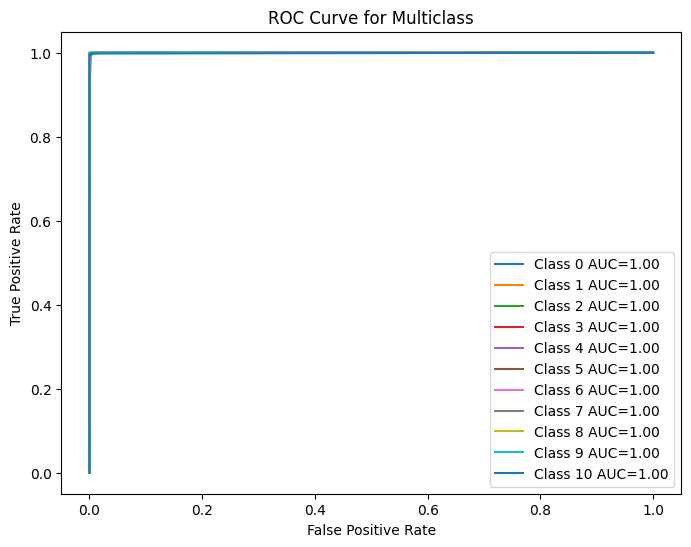

In [20]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Get probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Initialize variables to store ROC and AUC for each class
false_positive_rate = {}
true_positive_rate = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(y_test_binarized.shape[1]):
    false_positive_rate[i], true_positive_rate[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    plt.plot(false_positive_rate[i], true_positive_rate[i], label=f"Class {i} AUC={roc_auc[i]:.2f}")
plt.title('ROC Curve for Multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
